In [40]:
import pandas as pd
import pydataset
import numpy as np
import plotly.express as px
import matplotlib
from matplotlib import pylab as plt
import geopandas as gpd
import geoplot as gplt
import import_ipynb
import midterm_project_pg1 as pg1
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [41]:
covid_world = pg1.covid_world
covid_world.tail()

name  \
40854  Zimbabwe   
40855  Zimbabwe   
40856  Zimbabwe   
40857  Zimbabwe   
40858  Zimbabwe   

                                                                                        geometry  \
40854  POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...   
40855  POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...   
40856  POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...   
40857  POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...   
40858  POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...   

            date  new_cases_smoothed_per_million  total_cases_per_million  \
40854 2020-10-09                           0.971                  534.955   
40855 2020-10-10                           1.307                  537.848   
40856 2020-10-11                           1.201                  538.925   
40857 2020-10-12                           1.211                  538.992   
40858 2020-10-13                           1.182                  539.665   

       new_deaths_smoothed_per_million  total_deaths_per_million  \
40854                            0.010                    15.407   
40855                            0.010                    15.407   
40856                            0.019                    15.475   
40857                            0.019                    15.475   
40858                            0.019                    15.475   

       total_tests_per_thousand  new_tests_smoothed_per_thousand  \
40854                       NaN                              NaN   
40855                       NaN                              NaN   
40856                       NaN                              NaN   
40857                       NaN                              NaN   
40858                       NaN                              NaN   

       tests_per_case  
40854             NaN  
40855             NaN  
40856             NaN  
40857             NaN  
40858             NaN

In [42]:
female_led_countries = ['Bangladesh','Belgium','Bolivia','Denmark','Estonia','Finland','Georgia','Germany','Iceland',
                        'Myanmar','Namibia','Nepal','New Zealand','Norway','Republic of Serbia','Slovakia','Taiwan',
                        'Trinidad and Tobago']
male_led_countries = ['Afghanistan','Angola','Albania','United Arab Emirates','Argentina','Armenia','Australia',
                      'Austria','Azerbaijan','Burundi','Benin','Burkina Faso','Bulgaria','The Bahamas',
                      'Bosnia and Herzegovina','Belarus','Belize','Bermuda','Brazil','Brunei','Bhutan','Botswana',
                      'Central African Republic','Canada','Switzerland','Chile','China','Ivory Coast','Cameroon',
                      'Democratic Republic of the Congo','Republic of the Congo','Colombia','Costa Rica','Cuba',
                      'Cyprus','Czech Republic','Djibouti','Dominican Republic','Algeria','Ecuador','Egypt',
                      'Eritrea','Western Sahara','Spain','Ethiopia','Fiji','Falkland Islands','France','Gabon',
                      'United Kingdom','Ghana','Guinea','Gambia','Guinea Bissau','Equatorial Guinea','Greece',
                      'Greenland','Guatemala','Guyana','Honduras','Croatia','Haiti','Hungary','Indonesia','India',
                      'Ireland','Iran','Iraq','Israel','Italy','Jamaica','Jordan','Japan','Kazakhstan','Kenya',
                      'Kyrgyzstan','Cambodia','South Korea','Kuwait','Laos','Lebanon','Liberia','Libya','Sri Lanka',
                      'Lesotho','Lithuania','Luxembourg','Latvia','Morocco','Moldova','Madagascar','Mexico',
                      'Macedonia','Mali','Malta','Montenegro','Mongolia','Mozambique','Mauritania','Malawi','Malaysia',
                      'New Caledonia','Niger','Nigeria','Nicaragua','Netherlands','Oman','Pakistan','Panama','Peru',
                      'Philippines','Papua New Guinea','Poland','Puerto Rico','Portugal','Paraguay','West Bank',
                      'Qatar','Romania','Russia','Rwanda','Saudi Arabia','Sudan','Senegal','Sierra Leone',
                      'El Salvador','Somalia','South Sudan','Suriname','Slovenia','Sweden','Swaziland','Syria','Chad',
                      'Togo','Thailand','Tajikistan','East Timor','Tunisia','Turkey','United Republic of Tanzania',
                      'Uganda','Ukraine','Uruguay','United States of America','Uzbekistan','Venezuela','Vietnam',
                      'Yemen','South Africa','Zambia','Zimbabwe']
print('female_led_countries:', len(female_led_countries))
print('male_led_countries:', len(male_led_countries))
print('fraction male led:' , len(male_led_countries)/(len(male_led_countries) + len(female_led_countries)))

female_led_countries: 18
male_led_countries: 152
fraction male led: 0.8941176470588236


In [43]:
gender = ['F' if name in female_led_countries else 'M' for name in covid_world['name']]
covid_world = covid_world.assign(leader_gender = gender)
covid_world.tail()

name  \
40854  Zimbabwe   
40855  Zimbabwe   
40856  Zimbabwe   
40857  Zimbabwe   
40858  Zimbabwe   

                                                                                        geometry  \
40854  POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...   
40855  POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...   
40856  POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...   
40857  POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...   
40858  POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...   

            date  new_cases_smoothed_per_million  total_cases_per_million  \
40854 2020-10-09                           0.971                  534.955   
40855 2020-10-10                           1.307                  537.848   
40856 2020-10-11                           1.201                  538.925   
40857 2020-10-12                           1.211                  538.992   
40858 2020-10-13                           1.182                  539.665   

       new_deaths_smoothed_per_million  total_deaths_per_million  \
40854                            0.010                    15.407   
40855                            0.010                    15.407   
40856                            0.019                    15.475   
40857                            0.019                    15.475   
40858                            0.019                    15.475   

       total_tests_per_thousand  new_tests_smoothed_per_thousand  \
40854                       NaN                              NaN   
40855                       NaN                              NaN   
40856                       NaN                              NaN   
40857                       NaN                              NaN   
40858                       NaN                              NaN   

       tests_per_case leader_gender  
40854             NaN             M  
40855             NaN             M  
40856             NaN             M  
40857             NaN             M  
40858             NaN             M

In [44]:
px.line(covid_world,
        x="date",
        y="new_cases_smoothed_per_million",
        line_group="name",
        color="leader_gender",
        color_discrete_sequence=["blue", "magenta"])

In [45]:
today = pd.Timestamp(2020, 10, 12)
todays_data = covid_world.query('date == @today').reset_index(drop=True)
todays_data = todays_data.drop(['date'],axis=1)
todays_data

name  \
0                         Afghanistan   
1                              Angola   
2                             Albania   
3                United Arab Emirates   
4                           Argentina   
5                             Armenia   
6                           Australia   
7                             Austria   
8                          Azerbaijan   
9                             Burundi   
10                            Belgium   
11                              Benin   
12                       Burkina Faso   
13                         Bangladesh   
14                           Bulgaria   
15                        The Bahamas   
16             Bosnia and Herzegovina   
17                            Belarus   
18                             Belize   
19                            Bermuda   
20                            Bolivia   
21                             Brazil   
22                             Brunei   
23                             Bhutan   
24                           Botswana   
25           Central African Republic   
26                             Canada   
27                        Switzerland   
28                              Chile   
29                              China   
30                        Ivory Coast   
31                           Cameroon   
32   Democratic Republic of the Congo   
33              Republic of the Congo   
34                           Colombia   
35                         Costa Rica   
36                               Cuba   
37                             Cyprus   
38                     Czech Republic   
39                            Germany   
40                           Djibouti   
41                            Denmark   
42                 Dominican Republic   
43                            Algeria   
44                            Ecuador   
45                              Egypt   
46                            Eritrea   
47                              Spain   
48                            Estonia   
49                           Ethiopia   
50                            Finland   
51                               Fiji   
52                   Falkland Islands   
53                             France   
54                              Gabon   
55                     United Kingdom   
56                            Georgia   
57                              Ghana   
58                             Guinea   
59                             Gambia   
60                      Guinea Bissau   
61                  Equatorial Guinea   
62                             Greece   
63                          Greenland   
64                          Guatemala   
65                             Guyana   
66                           Honduras   
67                            Croatia   
68                              Haiti   
69                            Hungary   
70                          Indonesia   
71                              India   
72                            Ireland   
73                               Iran   
74                               Iraq   
75                            Iceland   
76                             Israel   
77                              Italy   
78                            Jamaica   
79                             Jordan   
80                              Japan   
81                         Kazakhstan   
82                              Kenya   
83                         Kyrgyzstan   
84                           Cambodia   
85                        South Korea   
86                             Kuwait   
87                               Laos   
88                            Lebanon   
89                            Liberia   
90                              Libya   
91                          Sri Lanka   
92                            Lesotho   
93                          Lithuania   
94                         Luxembourg   
95                             Latvia   
96                            Morocco   
97             

In [46]:
y = todays_data['leader_gender']
X = todays_data.loc[:, 'new_cases_smoothed_per_million': 'tests_per_case']
print(y)
print()
print(X.head())

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     F
11     M
12     M
13     F
14     M
15     M
16     M
17     M
18     M
19     M
20     F
21     M
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
30     M
31     M
32     M
33     M
34     M
35     M
36     M
37     M
38     M
39     F
40     M
41     F
42     M
43     M
44     M
45     M
46     M
47     M
48     F
49     M
50     F
51     M
52     M
53     M
54     M
55     M
56     F
57     M
58     M
59     M
60     M
61     M
62     M
63     M
64     M
65     M
66     M
67     M
68     M
69     M
70     M
71     M
72     M
73     M
74     M
75     F
76     M
77     M
78     M
79     M
80     M
81     M
82     M
83     M
84     M
85     M
86     M
87     M
88     M
89     M
90     M
91     M
92     M
93     M
94     M
95     M
96     M
97     M
98     M
99     M
100    M
101    M
102    M
103    F
104    M
105    M
106    M
107    M
108    M
109    M
110    F
1

In [47]:
for i in range(len(X.columns)):
    print(X.iloc[:,i])
    print(X.iloc[:,i].describe())
    print()

0        1.681
1        3.808
2       56.243
3      107.290
4      302.557
5      190.670
6        0.717
7      116.822
8       18.190
9        0.132
10     376.951
11       0.636
12       0.772
13       8.307
14      57.875
15     243.031
16      84.561
17      48.968
18      82.994
19       6.882
20      20.878
21     120.768
22       0.000
23       2.037
24      81.889
25       0.266
26      45.273
27      98.494
28      83.639
29       0.018
30       1.473
31       1.501
32       0.145
33       0.751
34     157.965
35     231.556
36       2.132
37      26.422
38     462.416
39      42.136
40       0.578
41      67.628
42      52.637
43       3.049
44      48.574
45       0.983
46       0.645
47     230.858
48      27.784
49       6.805
50      26.866
51       0.000
52       0.000
53     253.448
54       2.439
55     211.990
56     131.642
57       0.809
58       2.915
59       2.246
60       1.670
61       1.833
62      34.484
63       5.033
64      29.918
65      68.290
66      64

In [48]:
groups = np.array(todays_data['leader_gender'])
print(groups)
print(len(groups))

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'F' 'M' 'M' 'F' 'M' 'M' 'M' 'M'
 'M' 'M' 'F' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'F' 'M' 'F' 'M' 'M' 'M' 'M' 'M' 'M' 'F' 'M' 'F' 'M' 'M' 'M'
 'M' 'M' 'F' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'F' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'F' 'M' 'M' 'M' 'M'
 'M' 'M' 'F' 'M' 'M' 'M' 'M' 'M' 'F' 'F' 'F' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'F' 'M' 'F'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'F' 'M' 'M' 'F' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M']
169


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

std_ftrs = ['total_cases_per_million', 'total_deaths_per_million', 'total_tests_per_thousand']

# collect all the encoders
preprocessor = ColumnTransformer(transformers=[('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])


for i in range(10):
    random_state = i
    print('random_state:', random_state)
    
    # stratified train-test split
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
    print('test balance:')
    print(y_test.value_counts())
    print(y_test.value_counts(normalize=True))
    print('test set:')
    print(X_test)
    print(y_test)
    print()
    
    # do StratifiedKFold split on other
    skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
    for train_index, val_index in skf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        print('train balance:')
        print(y_train.value_counts())
        print(y_train.value_counts(normalize=True))
        
        print('training set:')
        print(X_train)
        print(y_train)
        print()
        
        print('val balance:')
        print(y_val.value_counts())
        print(y_val.value_counts(normalize=True))
        
        print('validation set:')
        print(X_val)
        print(y_val)
        print()
        
        
        X_train_prep = clf.fit_transform(X_train)
        X_test_prep = clf.transform(X_test)
        X_val_prep = clf.transform(X_val)
        
        le = LabelEncoder()
        y_train_prep = le.fit_transform(y_train)
        y_val_prep = le.transform(y_val)
        y_test_prep = le.transform(y_test)
        
        print('training_prep set:')
        print(X_train_prep)
        print(y_train_prep)
        print()
        print('validation_prep set:')
        print(X_val_prep)
        print(y_val_prep)
        print()
        print('test_prep set:')
        print(X_test_prep)
        print(y_test_prep)
        print()
        print()
    
    
        
    print()

random_state: 0
test balance:
M    30
F     4
Name: leader_gender, dtype: int64
M    0.882353
F    0.117647
Name: leader_gender, dtype: float64
test set:
     new_cases_smoothed_per_million  total_cases_per_million  \
97                          197.325                15406.934   
48                           27.784                 2913.597   
128                         110.019                 6964.569   
130                         157.563                 8071.814   
142                          26.787                 8610.139   
129                          73.733                44422.886   
9                             0.132                   44.068   
143                         175.626                 3635.952   
44                           48.574                 8333.758   
115                         322.659                10180.992   
28                           83.639                25181.300   
90                          122.726                 6216.012   
61            

39                        NaN                              NaN             NaN  
150    M
29     M
83     M
26     M
101    M
147    M
123    M
72     M
148    M
104    M
127    M
36     M
157    M
49     M
63     M
92     M
3      M
136    M
103    F
6      M
119    M
70     M
166    M
38     M
153    M
163    M
39     F
Name: leader_gender, dtype: object

training_prep set:
[[ 0.31769643  0.40820268  0.40594259]
 [ 0.03782695 -0.06287623  0.41392114]
 [ 0.08963586  0.31756349         nan]
 [ 0.16533477  1.06575435 -0.44857214]
 [ 4.37198669  0.51689337         nan]
 [ 2.89520844  2.89044846         nan]
 [-0.62977225 -0.55480706         nan]
 [-0.68957671 -0.52415122         nan]
 [-0.6164095  -0.50417164         nan]
 [ 0.07399356  0.1047272          nan]
 [-0.41178435 -0.40513122  0.14295483]
 [ 1.06199188  2.90901048         nan]
 [ 0.6449133   0.7803056          nan]
 [-0.69635461 -0.55605609         nan]
 [-0.67613487 -0.61864655         nan]
 [-0.18451928 -0.29990015         na

137                    11.830                            0.058          38.902  
141    F
64     M
73     M
150    M
76     M
29     M
83     M
26     M
80     M
114    M
101    M
2      M
62     M
20     F
16     M
152    F
25     M
167    M
125    M
122    M
147    M
123    M
132    M
72     M
134    M
84     M
95     M
66     M
46     M
24     M
42     M
148    M
149    M
104    M
105    M
140    M
69     M
159    M
7      M
14     M
155    F
82     M
127    M
15     M
36     M
53     M
41     F
30     M
77     M
162    M
59     M
157    M
160    M
49     M
63     M
92     M
57     M
3      M
22     M
131    M
54     M
136    M
103    F
8      M
6      M
47     M
139    M
102    M
74     M
99     M
119    M
89     M
75     F
70     M
158    M
56     F
165    M
4      M
112    M
138    M
58     M
106    M
166    M
151    M
156    M
87     M
110    F
120    M
65     M
71     M
78     M
93     M
164    M
118    F
38     M
68     M
168    M
111    M
98     M
153    M
45     M
163    M
3

validation_prep set:
[[-6.05458871e-01 -5.10451761e-01             nan]
 [ 7.25743639e-02  1.82853820e-01             nan]
 [-1.81306753e-01 -2.77863763e-01             nan]
 [-2.29005092e-01 -1.92849190e-01 -2.20388568e-01]
 [ 3.10973369e+00  5.05978613e+00             nan]
 [ 7.26479707e-01  1.76707984e-01  2.48136370e-01]
 [-5.13058797e-01 -5.21112444e-01  2.00494723e-01]
 [ 5.39560046e-01  7.90518393e-01             nan]
 [ 9.01552834e-01  4.89694124e-01             nan]
 [-7.20414204e-01 -6.39136193e-01 -6.00131616e-01]
 [-6.08729287e-01 -5.60397258e-01             nan]
 [ 9.51890036e-01  2.18904875e+00             nan]
 [-6.10009804e-01 -6.15122850e-01             nan]
 [ 1.49908828e-01  2.73497279e+00 -8.10364319e-02]
 [-4.98596169e-01 -5.85217631e-01             nan]
 [-6.74044746e-01 -6.02097516e-01             nan]
 [-1.07544642e-01 -3.01820671e-01             nan]
 [-3.09296775e-02  1.37061982e-01 -3.37952100e-01]
 [ 1.64501368e-01  8.09537187e-04 -3.65203749e-01]
 [-2.83747

[[ 0.28869795  0.4699995   0.14656655]
 [-0.59360952 -0.57968288         nan]
 [ 4.29842534  0.58573426         nan]
 [-0.74476735 -0.60601862         nan]
 [ 0.37658691  0.25430505         nan]
 [-0.0469856   0.7169274          nan]
 [ 2.83787914  3.11311548         nan]
 [-0.70750372 -0.52277869         nan]
 [-0.63514072 -0.50150426         nan]
 [-0.72990557 -0.58899803         nan]
 [ 0.04767375  0.14685629         nan]
 [-0.43276471 -0.3960452  -0.02908027]
 [ 1.02481245  3.13288047         nan]
 [-0.71420711 -0.55675126         nan]
 [-0.69420962 -0.6233981          nan]
 [-0.20799764 -0.28399428         nan]
 [-0.60361044 -0.55564822         nan]
 [-0.25603233 -0.20449096 -0.23004926]
 [ 3.10624998  4.70763099         nan]
 [-0.74232568 -0.59383768         nan]
 [-0.3334663  -0.35568133         nan]
 [-0.29014891 -0.31896434         nan]
 [-0.69757473 -0.61076855         nan]
 [ 0.53648565  1.32830182  0.59258607]
 [ 0.70619019  0.14110887  0.28086785]
 [-0.0080735  -0.20686593

88                        NaN                              NaN             NaN  
15     M
19     M
110    F
126    M
14     M
138    M
130    M
151    M
41     F
131    M
149    M
150    M
132    M
161    M
115    M
63     M
32     M
134    M
148    M
104    M
61     M
46     M
47     M
86     M
38     M
128    M
88     M
Name: leader_gender, dtype: object

training_prep set:
[[-6.85510702e-01 -6.32267876e-01 -8.99820466e-01]
 [-5.97940400e-01 -5.77809621e-01             nan]
 [ 3.29854643e-01 -1.50784886e-01             nan]
 [-2.13323220e-01 -1.40394033e-01             nan]
 [ 6.67860884e-01  4.61798738e-01 -3.19439098e-01]
 [-7.37436132e-01 -6.43052147e-01             nan]
 [-5.96904227e-01 -4.71461898e-01 -8.43034083e-01]
 [ 3.14092314e-01  9.78457891e-02             nan]
 [-7.69257991e-01 -6.70521953e-01 -8.86543705e-01]
 [-7.14780718e-01 -6.71882716e-01             nan]
 [-7.40489358e-01 -6.69073251e-01 -7.70644584e-01]
 [-6.61189002e-01 -6.05945923e-01             nan]
 [-7.2438

18                        NaN                              NaN             NaN  
98     M
60     M
81     M
39     F
74     M
140    M
155    F
23     M
82     M
22     M
108    M
152    F
15     M
120    M
42     M
90     M
89     M
127    M
72     M
44     M
67     M
19     M
43     M
110    F
9      M
27     M
53     M
111    M
143    F
103    F
59     M
99     M
37     M
126    M
137    M
92     M
141    F
14     M
26     M
10     F
102    M
16     M
17     M
4      M
29     M
162    M
35     M
138    M
73     M
21     M
130    M
114    M
151    M
146    M
41     F
101    M
51     M
122    M
131    M
49     M
31     M
119    M
40     M
149    M
28     M
150    M
6      M
13     F
55     M
125    M
132    M
36     M
165    M
161    M
94     M
168    M
115    M
139    M
156    M
63     M
85     M
32     M
105    M
109    M
84     M
50     F
45     M
96     M
134    M
148    M
166    M
104    M
147    M
61     M
78     M
46     M
93     M
76     M
47     M
86     M
52     M
5      M
3

121                       NaN                              NaN             NaN  
98     M
74     M
140    M
70     M
83     M
155    F
23     M
91     M
82     M
22     M
108    M
152    F
15     M
120    M
42     M
20     F
89     M
127    M
67     M
19     M
43     M
110    F
9      M
27     M
53     M
66     M
2      M
111    M
143    F
103    F
59     M
107    M
136    M
126    M
0      M
92     M
87     M
14     M
26     M
145    M
113    M
10     F
102    M
30     M
17     M
4      M
56     F
62     M
35     M
138    M
64     M
73     M
21     M
130    M
114    M
151    M
146    M
11     M
41     F
12     M
51     M
54     M
34     M
131    M
49     M
31     M
119    M
149    M
150    M
6      M
100    M
13     F
55     M
97     M
125    M
132    M
36     M
161    M
94     M
115    M
118    F
63     M
85     M
32     M
105    M
109    M
84     M
96     M
134    M
133    M
158    M
148    M
166    M
104    M
147    M
61     M
123    M
46     M
76     M
47     M
86     M
5      M
3

 [ 3.42480633e+00  2.09378221e+00             nan]]
[1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

validation_prep set:
[[-0.74989847 -0.65869406 -0.84050168]
 [-0.80508284 -0.66996992         nan]
 [-0.8389019  -0.69869191 -0.83178962]
 [-0.78100553 -0.7001147          nan]
 [-0.62133765 -0.55617568 -0.74551858]
 [ 0.22269352  0.30248352  0.26097905]
 [-0.82781533 -0.7001147          nan]
 [-0.7133492  -0.60523293         nan]
 [ 1.34676337  3.56030708         nan]
 [ 0.51053139 -0.24123073         nan]
 [ 2.18539594  1.85559538         nan]
 [ 1.78443127  0.32208803         nan]
 [ 0.06881906  0.94450585 -0.52775557]
 [-0.72068715 -0.58834334         nan]
 [-0.73008137 -0.64593734 -0.78247455]
 [-0.72005804 -0.62299846         nan]
 [ 2.33091878  0.28357104         nan]
 [-0.49080136 -0.53779071 -0.77690497]
 [-0

training_prep set:
[[-7.19320739e-01 -6.49786202e-01 -6.95201425e-01]
 [-6.36306696e-01 -5.93667381e-01             nan]
 [ 2.43215424e-01 -1.53621611e-01             nan]
 [-2.71701043e-01 -1.42913915e-01             nan]
 [-7.68544503e-01 -6.60899312e-01             nan]
 [-6.35324435e-01 -4.84076853e-01 -6.55127557e-01]
 [ 2.28273205e-01  1.02590425e-01             nan]
 [-7.98710680e-01 -6.89206740e-01 -6.85832080e-01]
 [-7.47067844e-01 -6.90608995e-01             nan]
 [-7.71438871e-01 -6.87713863e-01 -6.04042648e-01]
 [ 9.60902497e-01  6.07159007e-01             nan]
 [-6.04646107e-01 -5.48747522e-01 -5.93052214e-01]
 [ 4.67608552e-02 -2.52614143e-01             nan]
 [ 8.18713085e-01  2.70402163e+00             nan]
 [ 3.73917867e-01  1.07318465e+00  1.15228358e+00]
 [ 3.35835315e-01  2.60507202e+00 -5.57882827e-01]
 [-3.98407146e-01 -1.28615126e-03             nan]
 [-1.60514967e-01 -4.50336879e-01 -4.14533228e-01]
 [ 1.48219050e-01  2.97518191e-01  4.89381848e-01]
 [ 3.5703678

M    96
F    12
Name: leader_gender, dtype: int64
M    0.888889
F    0.111111
Name: leader_gender, dtype: float64
training set:
     new_cases_smoothed_per_million  total_cases_per_million  \
21                          120.768                23969.685   
128                         110.019                 6964.569   
52                            0.000                 3732.415   
95                           44.231                 1415.543   
14                           57.875                 3511.865   
13                            8.307                 2296.845   
50                           26.866                 2089.982   
115                         322.659                10180.992   
46                            0.645                  116.737   
61                            1.833                 3608.734   
132                           0.331                  378.005   
165                           0.048                   68.900   
84                            0.026     

     new_cases_smoothed_per_million  total_cases_per_million  \
21                          120.768                23969.685   
95                           44.231                 1415.543   
14                           57.875                 3511.865   
164                          87.455                10890.310   
50                           26.866                 2089.982   
148                           1.484                  234.335   
115                         322.659                10180.992   
106                           3.679                  319.976   
111                           0.000                   94.574   
99                           58.350                 6315.913   
165                           0.048                   68.900   
84                            0.026                   16.927   
104                         396.230                22082.215   
22                            0.000                  333.727   
162                          23.627     

 [-0.74946163 -0.65088492         nan]]
[1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1]

test_prep set:
[[ 0.46686263  0.61584923         nan]
 [-0.71380233 -0.56990692         nan]
 [-0.15775839 -0.35088721         nan]
 [-0.71051813 -0.62386895 -1.05462105]
 [ 0.51729952 -0.17728371         nan]
 [ 2.08939593  1.98679143         nan]
 [-0.74110894 -0.62290998         nan]
 [-0.18105572 -0.12755214  0.25381387]
 [-0.63195861 -0.62464312         nan]
 [-0.3076993  -0.36277943         nan]
 [ 1.8200976   2.08128492 -0.39024087]
 [-0.57866715 -0.4457503          nan]
 [-0.70738462 -0.62499274  0.92026593]
 [-0.57843561 -0.54936898         nan]
 [-0.37812633 -0.4164318          nan]
 [ 0.86486621  1.85356955         nan]
 [-0.71687709 -0.62634629         nan]
 [-0.53663524 -0.4090747          nan]
 [-0.74933379 -0.6494165  -1.04126899]
 [ 1.46054613  1.15804675         nan]
 [ 4.09043089  0.49339578         nan]
 [ 3.25275724  2.23261734         nan]
 [ 0.44455226  2.80030747 -0.8

151                       NaN                              NaN             NaN  
21     M
128    M
52     M
14     M
164    M
13     F
148    M
115    M
106    M
111    M
46     M
61     M
132    M
99     M
165    M
84     M
22     M
162    M
10     F
1      M
82     M
94     M
163    M
86     M
103    F
139    M
93     M
100    M
25     M
0      M
134    M
160    M
77     M
133    M
40     M
157    M
107    M
80     M
101    M
11     M
98     M
141    F
168    M
159    M
96     M
29     M
83     M
54     M
16     M
145    M
102    M
131    M
32     M
49     M
41     F
126    M
28     M
109    M
110    F
108    M
130    M
166    M
120    M
156    M
2      M
64     M
6      M
167    M
92     M
9      M
30     M
122    M
140    M
47     M
15     M
67     M
26     M
129    M
137    M
88     M
7      M
125    M
149    M
51     M
68     M
62     M
39     F
18     M
116    F
81     M
69     M
37     M
48     F
72     M
152    F
146    M
161    M
150    M
87     M
85     M
23     M
117    F
3

 [-5.14923400e-01 -5.65388612e-01             nan]]
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1]


train balance:
M    97
F    11
Name: leader_gender, dtype: int64
M    0.898148
F    0.101852
Name: leader_gender, dtype: float64
training set:
     new_cases_smoothed_per_million  total_cases_per_million  \
21                          120.768                23969.685   
128                         110.019                 6964.569   
52                            0.000                 3732.415   
95                           44.231                 1415.543   
14                           57.875                 3511.865   
164                          87.455                10890.310   
13                            8.307                 2296.845   
50                           26.866                 2089.982   
148                           1.484                  234.335   
115                         322.659                10180.992   
106                          

training_prep set:
[[ 2.45137513  2.84892586         nan]
 [ 0.15942711  0.08204456         nan]
 [-0.27620232 -0.6680565          nan]
 [-0.58847012 -0.56270813  0.13002121]
 [-0.30592803 -0.03034293 -0.36953922]
 [ 0.68853813 -0.23472582         nan]
 [-0.46968832 -0.50143251 -0.68499969]
 [-0.49756929 -0.35784338         nan]
 [-0.74767323 -0.63865315 -0.68626981]
 [ 0.59293632  1.23811961         nan]
 [-0.73613054 -0.65677006 -0.7198354 ]
 [-0.76651021 -0.6680565          nan]
 [-0.76352308 -0.6680565          nan]
 [-0.29287203 -0.37417195         nan]
 [-0.7283094  -0.65616898         nan]
 [ 0.07200131  2.55456939         nan]
 [ 2.19698209  0.92965013         nan]
 [-0.38520638 -0.54629511         nan]
 [ 1.14872958  3.70522477         nan]
 [-0.7536429  -0.63510626         nan]
 [-0.67512013 -0.59728775         nan]
 [ 1.23605996  0.36359947         nan]
 [-0.77772133 -0.66626816 -0.6840776 ]
 [ 2.72758863  0.09734484  0.09249157]
 [-0.70996181 -0.60907592         nan]
 [-0.1

     new_cases_smoothed_per_million  total_cases_per_million  \
148                           1.484                  234.335   
37                           26.422                 2267.385   
101                           0.720                  162.265   
6                             0.717                 1069.181   
165                           0.048                   68.900   
63                            5.033                  281.829   
25                            0.266                 1005.018   
20                           20.878                11871.298   
13                            8.307                 2296.845   
30                            1.473                  764.038   
123                          21.959                 3096.711   
154                          18.785                 3978.382   
153                          94.355                 2644.895   
58                            2.915                  839.273   
85                            1.502     

Name: leader_gender, dtype: float64
training set:
     new_cases_smoothed_per_million  total_cases_per_million  \
148                           1.484                  234.335   
37                           26.422                 2267.385   
53                          253.448                11259.912   
101                           0.720                  162.265   
6                             0.717                 1069.181   
134                          11.818                 9745.168   
165                           0.048                   68.900   
25                            0.266                 1005.018   
43                            3.049                 1210.279   
13                            8.307                 2296.845   
30                            1.473                  764.038   
154                          18.785                 3978.382   
153                          94.355                 2644.895   
122                          91.862                257

[[-7.19088414e-01 -6.18978341e-01 -5.99469632e-01]
 [-4.31953169e-01 -5.12980337e-01             nan]
 [ 8.38095006e-01  1.70268859e+00             nan]
 [-7.29267129e-01 -6.16171781e-01             nan]
 [-6.01179995e-01 -4.81709919e-01  7.45285937e-01]
 [ 6.24162053e-01  3.19983055e-02  2.52687014e-01]
 [-7.42453417e-01 -5.53082751e-01             nan]
 [-6.10241975e-01 -5.86564683e-01             nan]
 [-5.81252198e-01 -4.54276850e-01             nan]
 [-4.27792423e-01 -4.89553293e-01 -5.98221399e-01]
 [-6.44276481e-01 -6.25397351e-01             nan]
 [-1.90302672e-01 -1.55778824e-01 -3.66320634e-02]
 [-3.78636022e-01 -4.65934147e-01             nan]
 [ 2.88606622e+00  4.08603892e+00             nan]
 [-6.84133912e-01 -6.07138313e-01 -4.46883148e-01]
 [ 2.30270712e-02 -3.57429449e-01             nan]
 [-2.29867749e-01 -5.44438172e-01             nan]
 [ 4.46759912e-01  5.41597426e-01             nan]
 [-7.06993016e-01 -6.36066027e-01 -6.32456743e-01]
 [ 1.42379441e+00  1.05022667e+

92                        NaN                              NaN             NaN  
148    M
37     M
53     M
101    M
6      M
134    M
63     M
25     M
20     F
43     M
13     F
30     M
123    M
154    M
153    M
58     M
122    M
40     M
158    M
117    F
66     M
106    M
97     M
73     M
96     M
35     M
146    M
156    M
11     M
50     F
139    M
1      M
16     M
15     M
24     M
69     M
84     M
79     M
65     M
114    M
98     M
45     M
109    M
17     M
159    M
19     M
164    M
118    F
18     M
161    M
103    F
46     M
102    M
105    M
12     M
113    M
168    M
93     M
82     M
80     M
81     M
86     M
34     M
56     F
61     M
47     M
44     M
94     M
126    M
116    F
138    M
41     F
111    M
51     M
136    M
112    M
38     M
27     M
60     M
131    M
129    M
48     F
64     M
127    M
33     M
166    M
14     M
95     M
119    M
67     M
144    M
83     M
5      M
147    M
150    M
91     M
121    M
10     F
52     M
71     M
3      M
21     M
5

Name: leader_gender, dtype: int64
M    0.888889
F    0.111111
Name: leader_gender, dtype: float64
validation set:
     new_cases_smoothed_per_million  total_cases_per_million  \
13                            8.307                 2296.845   
153                          94.355                 2644.895   
40                            0.578                 5488.855   
117                         102.629                 3698.243   
96                           64.128                 4059.570   
35                          231.556                17164.712   
156                           0.000                    8.521   
16                           84.561                 9118.771   
69                          104.950                 3993.334   
114                           2.027                  794.620   
98                            0.825                  603.734   
159                           6.128                  660.386   
18                           82.994                 61

     new_cases_smoothed_per_million  total_cases_per_million  \
53                          253.448                11259.912   
134                          11.818                 9745.168   
165                           0.048                   68.900   
63                            5.033                  281.829   
20                           20.878                11871.298   
43                            3.049                 1210.279   
13                            8.307                 2296.845   
123                          21.959                 3096.711   
153                          94.355                 2644.895   
58                            2.915                  839.273   
122                          91.862                25760.493   
85                            1.502                  481.829   
40                            0.578                 5488.855   
158                         112.930                 5968.707   
117                         102.629     


training_prep set:
[[-8.24159455e-01 -7.01167751e-01             nan]
 [ 3.02885641e+00  2.43861063e+00             nan]
 [-3.79375148e-01 -5.98058561e-01             nan]
 [ 9.45188324e-01  2.68154444e-01             nan]
 [-2.66385914e-01 -6.47101720e-01 -1.50230076e-01]
 [-7.30910922e-01 -6.06294521e-01             nan]
 [-7.90900476e-01 -6.60297645e-01 -5.36449961e-01]
 [-5.23472837e-01 -3.98987369e-01             nan]
 [-8.52887730e-01 -6.86583036e-01             nan]
 [ 2.29696978e+00  9.64504398e-01             nan]
 [-4.93971623e-01 -5.63053311e-01             nan]
 [ 1.79277927e-01  2.43801059e+00             nan]
 [-6.69762957e-01 -5.02425610e-01             nan]
 [ 1.07058466e+00  7.49498414e-01             nan]
 [-8.29770910e-01 -6.77393795e-01             nan]
 [-8.22409035e-01 -6.74993656e-01 -8.48958564e-01]
 [ 6.07848481e-01  2.35144591e+00  1.60950534e+00]
 [ 9.39976809e-01 -2.79057852e-01             nan]
 [ 5.60796005e-01  1.81449429e-01             nan]
 [ 1.440049

Name: leader_gender, dtype: object

val balance:
M    24
F     3
Name: leader_gender, dtype: int64
M    0.888889
F    0.111111
Name: leader_gender, dtype: float64
validation set:
     new_cases_smoothed_per_million  total_cases_per_million  \
63                            5.033                  281.829   
160                         148.768                23451.607   
12                            0.772                  109.074   
166                          26.934                11675.709   
18                           82.994                 6103.802   
66                           64.213                 8489.079   
91                            9.006                  221.919   
134                          11.818                 9745.168   
161                           9.557                 1825.499   
39                           42.136                 3882.975   
77                           69.987                 5870.646   
97                          197.325                15

     new_cases_smoothed_per_million  total_cases_per_million  \
106                           3.679                  319.976   
103                          26.728                  514.135   
119                         129.244                20735.821   
63                            5.033                  281.829   
68                            0.789                  778.950   
69                          104.950                 3993.334   
160                         148.768                23451.607   
126                         149.606                18760.574   
124                           0.224                   61.920   
42                           52.637                10921.649   
71                           51.420                 5159.794   
143                         175.626                 3635.952   
85                            1.502                  481.829   
12                            0.772                  109.074   
5                           190.670     

     new_cases_smoothed_per_million  total_cases_per_million  \
106                           3.679                  319.976   
103                          26.728                  514.135   
119                         129.244                20735.821   
63                            5.033                  281.829   
68                            0.789                  778.950   
69                          104.950                 3993.334   
160                         148.768                23451.607   
126                         149.606                18760.574   
56                          131.642                 2956.501   
124                           0.224                   61.920   
71                           51.420                 5159.794   
143                         175.626                 3635.952   
92                            8.336                  842.571   
50                           26.866                 2089.982   
12                            0.772     

87                        NaN                              NaN             NaN  
106    M
103    F
119    M
63     M
68     M
69     M
160    M
126    M
56     F
124    M
42     M
71     M
92     M
85     M
50     F
12     M
5      M
37     M
162    M
81     M
43     M
166    M
55     M
142    M
18     M
53     M
66     M
88     M
123    M
91     M
95     M
28     M
132    M
134    M
46     M
15     M
102    M
65     M
16     M
34     M
137    M
161    M
39     F
77     M
97     M
155    F
93     M
114    M
51     M
139    M
98     M
44     M
107    M
117    F
29     M
17     M
86     M
90     M
138    M
47     M
10     F
159    M
94     M
67     M
8      M
165    M
45     M
146    M
9      M
54     M
30     M
41     F
62     M
52     M
72     M
167    M
133    M
112    M
59     M
79     M
109    M
127    M
83     M
11     M
149    M
27     M
61     M
122    M
157    M
110    F
121    M
4      M
36     M
40     M
111    M
19     M
152    F
150    M
115    M
148    M
120    M
22     M
2

133                       NaN                              NaN             NaN  
64     M
138    M
23     M
35     M
151    M
82     M
85     M
68     M
19     M
134    M
158    M
49     M
50     F
37     M
16     M
152    F
129    M
24     M
6      M
15     M
106    M
70     M
112    M
42     M
102    M
128    M
62     M
10     F
93     M
58     M
31     M
36     M
55     M
130    M
103    F
1      M
90     M
116    F
147    M
105    M
121    M
163    M
122    M
88     M
140    M
56     F
117    F
9      M
76     M
126    M
27     M
160    M
14     M
111    M
4      M
54     M
132    M
84     M
131    M
12     M
20     F
144    M
57     M
74     M
100    M
155    F
29     M
101    M
26     M
41     F
125    M
80     M
156    M
109    M
166    M
142    M
137    M
98     M
81     M
115    M
59     M
38     M
48     F
25     M
13     F
78     M
44     M
32     M
7      M
113    M
45     M
61     M
87     M
71     M
72     M
94     M
157    M
60     M
104    M
150    M
3      M
97     M
1

104                       NaN                              NaN             NaN  
151    M
85     M
68     M
158    M
6      M
42     M
62     M
93     M
90     M
147    M
121    M
163    M
27     M
54     M
132    M
84     M
26     M
41     F
80     M
166    M
38     M
48     F
13     F
32     M
61     M
60     M
104    M
Name: leader_gender, dtype: object

training_prep set:
[[-7.08819076e-02  2.34775783e-01             nan]
 [-7.42716349e-01 -6.09353857e-01             nan]
 [-7.28229236e-01 -6.51715217e-01             nan]
 [ 1.45232362e+00  3.39613813e-01             nan]
 [-6.63736264e-02 -3.61948687e-01             nan]
 [-6.79818803e-01 -5.84855043e-01             nan]
 [-2.52282994e-01 -3.24679513e-01             nan]
 [-3.95991025e-01  2.65781020e-02             nan]
 [ 4.87251758e-01  2.81315708e-02  3.77161413e-01]
 [-6.84945054e-01 -5.99174178e-01 -5.43043717e-01]
 [-5.08470429e-01 -3.58635245e-01             nan]
 [-4.85395340e-01 -5.17760206e-01             nan]
 [ 4.0577


train balance:
M    97
F    11
Name: leader_gender, dtype: int64
M    0.898148
F    0.101852
Name: leader_gender, dtype: float64
training set:
     new_cases_smoothed_per_million  total_cases_per_million  \
23                            2.037                  400.460   
35                          231.556                17164.712   
40                            0.578                 5488.855   
151                           0.000                   21.237   
82                            5.630                  772.643   
85                            1.502                  481.829   
68                            0.789                  778.950   
96                           64.128                 4059.570   
19                            6.882                 2954.732   
158                         112.930                 5968.707   
37                           26.422                 2267.385   
164                          87.455                10890.310   
129                     

 [-0.70245869 -0.61599362 -0.56475776]]
[1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

test_prep set:
[[-6.02608584e-01 -4.25753973e-01             nan]
 [-5.50033303e-01 -4.67531791e-01 -5.58314437e-01]
 [ 2.25990739e+00  2.98841453e+00             nan]
 [-6.34833178e-01 -5.95907246e-01             nan]
 [-2.45767815e-01 -3.39678198e-02             nan]
 [-6.96832788e-01 -5.54740885e-01             nan]
 [ 1.25496108e-02  1.11255024e+00 -4.21015384e-01]
 [-6.90951033e-01 -5.92671618e-01  2.10816383e-01]
 [-6.31018289e-01 -5.01401429e-01             nan]
 [ 1.50401322e+00  2.16824651e+00 -3.39382571e-01]
 [-1.20600377e-01 -1.22787084e-01             nan]
 [-7.15579406e-01 -6.19086572e-01             nan]
 [-6.14443071e-01 -5.35979337e-01             nan]
 [-6.91252911e-01 -5.21941298e-01             nan]
 [-5.53562530e-01 -5.11026785e-01  1.48034303e-01]
 [-7.00909886e-01 -5.88926442e-01 -5.79235085e-01]
 [ 1.85650570e+00  4.16645618e-01             nan]
 [-7.21546734e-01 -5.

test balance:
M    30
F     4
Name: leader_gender, dtype: int64
M    0.882353
F    0.117647
Name: leader_gender, dtype: float64
test set:
     new_cases_smoothed_per_million  total_cases_per_million  \
29                            0.018                   63.094   
70                           15.643                 1219.087   
142                          26.787                 8610.139   
89                            0.424                  269.491   
45                            0.983                 1020.058   
103                          26.728                  514.135   
128                         110.019                 6964.569   
138                           0.663                  289.082   
79                          130.016                 2442.973   
99                           58.350                 6315.913   
157                           3.101                  214.272   
148                           1.484                  234.335   
95                           4

     new_cases_smoothed_per_million  total_cases_per_million  \
25                            0.266                 1005.018   
62                           34.484                 2145.052   
30                            1.473                  764.038   
132                           0.331                  378.005   
163                           0.019                   11.393   
46                            0.645                  116.737   
153                          94.355                 2644.895   
146                           2.506                  267.019   
54                            2.439                 3969.488   
14                           57.875                 3511.865   
104                         396.230                22082.215   
47                          230.858                19013.413   
21                          120.768                23969.685   
137                           1.485                  911.853   
81                           14.425     

Name: leader_gender, dtype: object

val balance:
M    24
F     3
Name: leader_gender, dtype: int64
M    0.888889
F    0.111111
Name: leader_gender, dtype: float64
validation set:
     new_cases_smoothed_per_million  total_cases_per_million  \
132                           0.331                  378.005   
21                          120.768                23969.685   
81                           14.425                 7655.229   
131                          81.952                 8899.324   
48                           27.784                 2913.597   
0                             1.681                 1022.366   
116                          28.249                 2807.659   
1                             3.808                  190.043   
129                          73.733                44422.886   
127                         117.923                 8499.215   
101                           0.720                  162.265   
43                            3.049                 1

     new_cases_smoothed_per_million  total_cases_per_million  \
25                            0.266                 1005.018   
62                           34.484                 2145.052   
30                            1.473                  764.038   
123                          21.959                 3096.711   
105                           0.174                   97.002   
132                           0.331                  378.005   
46                            0.645                  116.737   
153                          94.355                 2644.895   
146                           2.506                  267.019   
54                            2.439                 3969.488   
14                           57.875                 3511.865   
93                           49.171                 2248.841   
47                          230.858                19013.413   
21                          120.768                23969.685   
81                           14.425     

training_prep set:
[[-7.39862911e-01 -6.57402407e-01 -5.89723760e-01]
 [ 1.91356381e+00  8.21583091e-01             nan]
 [-6.46263401e-01 -6.24993602e-01             nan]
 [ 2.14279718e+00  2.63155252e+00             nan]
 [-7.58681357e-01 -6.58892144e-01             nan]
 [ 3.32645668e+00  3.88144608e-01             nan]
 [-3.25649892e-01 -3.83862352e-01             nan]
 [-5.71115315e-01 -5.20904092e-01             nan]
 [ 5.36125851e-01 -4.74352157e-01  5.44549427e+00]
 [-2.86228290e-01 -5.71470822e-01             nan]
 [-6.79271831e-01 -6.32685892e-01 -5.92961982e-01]
 [-1.01701050e-01 -3.95892680e-01             nan]
 [-7.33213883e-01 -6.42847022e-01             nan]
 [-4.89370912e-01 -5.27996739e-01 -5.88184098e-01]
 [-2.02921552e-01 -3.94333063e-02 -2.96316759e-01]
 [-7.30460853e-01 -5.95817246e-01             nan]
 [ 4.52193889e-01  1.09576495e+00             nan]
 [-7.35893436e-01 -6.25972706e-01             nan]
 [ 1.40685647e+00  1.87750205e+00 -2.63381139e-01]
 [-6.2026470

78                        NaN                              NaN             NaN  
47     M
105    M
147    M
63     M
4      M
142    M
57     M
86     M
62     M
72     M
35     M
36     M
13     F
159    M
85     M
126    M
158    M
51     M
56     F
138    M
153    M
37     M
134    M
29     M
94     M
120    M
78     M
Name: leader_gender, dtype: object

training_prep set:
[[ 2.39397839e+00  9.54215984e-01             nan]
 [-6.74943852e-01 -5.57135722e-01             nan]
 [ 9.29844072e-01  8.46153776e-01             nan]
 [-6.09698215e-01 -5.81967712e-01 -6.48047988e-01]
 [ 3.48784911e-01  1.85602061e-01             nan]
 [ 4.82930011e-01  3.72079517e-01             nan]
 [ 4.22797199e-01  7.54525812e-01 -9.56726870e-02]
 [ 1.13105781e-01  2.32269220e+00 -1.51428219e-01]
 [-1.26445814e-01 -2.99359081e-01 -1.53630917e-01]
 [ 7.40876660e-01 -4.92353821e-01             nan]
 [-2.77170592e-01 -3.51917982e-01             nan]
 [ 2.91149051e+00  4.36121646e+00             nan]
 [-3.1783

test balance:
M    30
F     4
Name: leader_gender, dtype: int64
M    0.882353
F    0.117647
Name: leader_gender, dtype: float64
test set:
     new_cases_smoothed_per_million  total_cases_per_million  \
154                          18.785                 3978.382   
5                           190.670                19050.470   
155                           0.060                   22.127   
110                          17.429                 4697.519   
145                          12.314                 4886.378   
21                          120.768                23969.685   
60                            1.670                 1211.891   
75                          253.271                10332.601   
57                            0.809                 1512.731   
25                            0.266                 1005.018   
144                         148.909                 4168.005   
122                          91.862                25760.493   
109                          1

 [ 3.60563408  2.71684375         nan]]
[1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]

test_prep set:
[[-1.12365898e-01 -1.79324234e-02  7.48503906e-01]
 [ 2.23177003e+00  1.36779878e+00             nan]
 [-7.27675436e-01 -6.22627230e-01 -9.39064410e-01]
 [-5.19756793e-04 -3.32783470e-01 -4.45406588e-01]
 [ 2.88531588e-02 -6.06375292e-02             nan]
 [ 2.99684708e+00  3.47302912e+00             nan]
 [-5.42633486e-01 -5.06700143e-01             nan]
 [ 8.75894858e-01 -4.54735223e-01             nan]
 [-4.95844359e-01 -5.67334564e-01             nan]
 [-5.74808088e-01 -5.50036074e-01             nan]
 [-8.28741588e-02 -2.29027251e-01  5.85442838e-01]
 [ 3.27536837e+00  5.22153091e+00             nan]
 [-6.55880315e-01 -5.96254122e-01 -3.12717925e-01]
 [ 5.89175051e-01  8.43461796e-01             nan]
 [-2.49490673e-01 -2.90495056e-01             nan]
 [ 1.17164760e-01  4.68827074e-01             nan]
 [ 8.52315371e-01  1.59640623e+00             nan]
 [ 8.31870089e-01  1.

Make histograms:

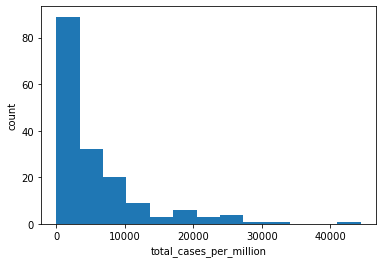

In [50]:
todays_data['total_cases_per_million'].plot.hist(bins = int(np.sqrt(todays_data.shape[0])))
plt.xlabel('total_cases_per_million')
plt.ylabel('count')
plt.show()

/Applications/anaconda3/envs/data1030/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/Applications/anaconda3/envs/data1030/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



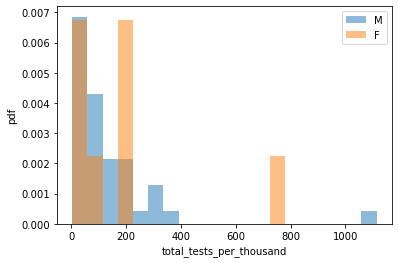

In [51]:
categories = todays_data['leader_gender'].unique()
bin_range = (todays_data['total_tests_per_thousand'].min(),todays_data['total_tests_per_thousand'].max())

for c in categories:
    plt.hist(todays_data[todays_data['leader_gender']==c]['total_tests_per_thousand'],alpha=0.5,label=c,range=bin_range,bins=20,density=True) # density=False
# When density is set equal to True, the histograms are normalized to be on the same plot.
    plt.legend()
plt.ylabel('pdf')
plt.xlabel('total_tests_per_thousand')
plt.show()

In [52]:
(todays_data['total_tests_per_thousand'].min() - todays_data['total_tests_per_thousand'].max())/-20

55.55884999999999

Make violin plots:

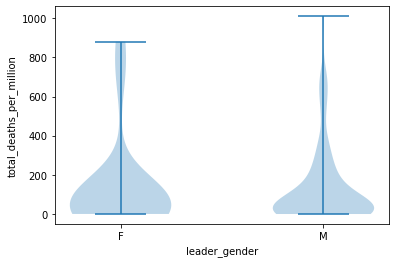

In [53]:
dataset = [todays_data[todays_data['leader_gender']=='F']['total_deaths_per_million'].values,
           todays_data[todays_data['leader_gender']=='M']['total_deaths_per_million'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['F','M'])
plt.xlabel('leader_gender')
plt.ylabel('total_deaths_per_million')
plt.show()

Make heat maps:

In [54]:
nbins = 25

heatmap, xedges, yedges = np.histogram2d(todays_data['total_cases_per_million'], 
                                         todays_data['total_deaths_per_million'], bins=nbins, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

/Applications/anaconda3/envs/data1030/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log10



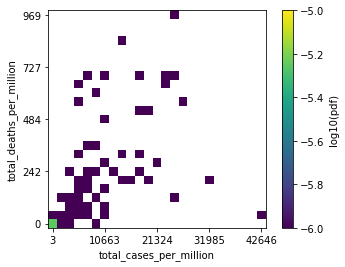

In [55]:
plt.imshow(np.log10(heatmap).T, origin='lower',vmin = -6, vmax = -5)
plt.xlabel('total_cases_per_million')
plt.ylabel('total_deaths_per_million')
plt.xticks(np.arange(nbins)[::int(nbins/4)],xedges[::int(nbins/4)].astype(int))
plt.yticks(np.arange(nbins)[::int(nbins/4)],yedges[::int(nbins/4)].astype(int))
plt.colorbar(label='log10(pdf)')
plt.show()

As we would expect, a positive correlation overall between per capita cases and per capita deaths

In [56]:
female = 'F'
male = 'M'
female_data = todays_data.query('leader_gender == @female')
male_data = todays_data.query('leader_gender == @male')
print(female_data)
print()
print(male_data)

                    name  \
10               Belgium   
13            Bangladesh   
20               Bolivia   
39               Germany   
41               Denmark   
48               Estonia   
50               Finland   
56               Georgia   
75               Iceland   
103              Myanmar   
110              Namibia   
116               Norway   
117                Nepal   
118          New Zealand   
141   Republic of Serbia   
143             Slovakia   
152  Trinidad and Tobago   
155               Taiwan   

                                                                                      geometry  \
10   POLYGON ((3.31497 51.34578, 4.04707 51.26726, 4.97399 51.47502, 5.60698 51.03730, 6.15...   
13   POLYGON ((92.67272 22.04124, 92.65226 21.32405, 92.30323 21.47548, 92.36855 20.67088, ...   
20   POLYGON ((-62.84647 -22.03498, -63.98684 -21.99364, -64.37702 -22.79809, -64.96489 -22...   
39   POLYGON ((9.92191 54.98310, 9.93958 54.59664, 10.95011 54.36361, 10.93

In [57]:
heatmap_female, xedges, yedges = np.histogram2d(female_data['total_cases_per_million'], 
                                                female_data['total_deaths_per_million'], bins=nbins, density=True)
heatmap_male, xedges, yedges = np.histogram2d(male_data['total_cases_per_million'], 
                                              male_data['total_deaths_per_million'], bins=nbins, density=True)

/Applications/anaconda3/envs/data1030/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log10



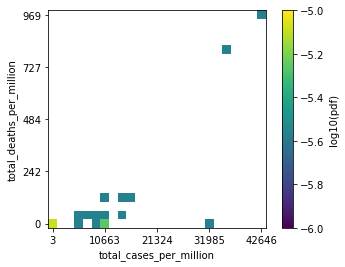

In [58]:
plt.imshow(np.log10(heatmap_female).T, origin='lower',vmin=-6, vmax=-5)
plt.xlabel('total_cases_per_million')
plt.ylabel('total_deaths_per_million')
plt.xticks(np.arange(nbins)[::int(nbins/4)],xedges[::int(nbins/4)].astype(int))
plt.yticks(np.arange(nbins)[::int(nbins/4)],yedges[::int(nbins/4)].astype(int))
plt.colorbar(label='log10(pdf)')
plt.show()

In [59]:
(xedges[-1]-xedges[0])/25

1776.789

/Applications/anaconda3/envs/data1030/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log10



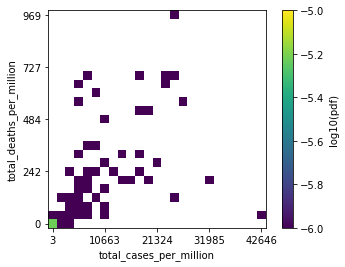

In [60]:
plt.imshow(np.log10(heatmap_male).T, origin='lower',vmin=-6, vmax=-5)
plt.xlabel('total_cases_per_million')
plt.ylabel('total_deaths_per_million')
plt.xticks(np.arange(nbins)[::int(nbins/4)],xedges[::int(nbins/4)].astype(int))
plt.yticks(np.arange(nbins)[::int(nbins/4)],yedges[::int(nbins/4)].astype(int))
plt.colorbar(label='log10(pdf)')
plt.show()

Make a whole scatter matrix of plots:

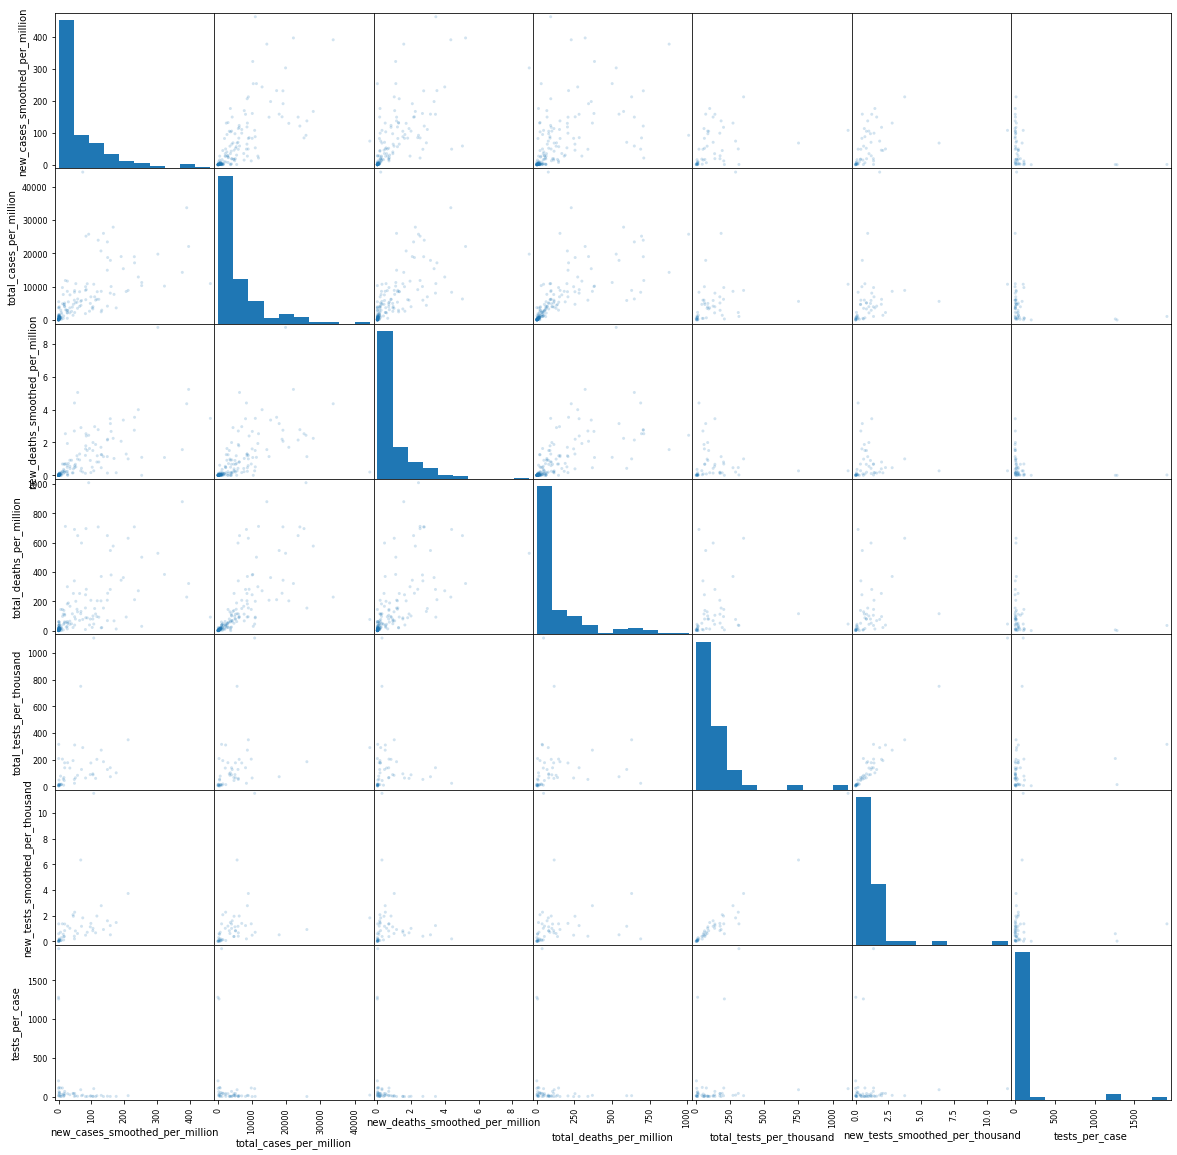

In [61]:
pd.plotting.scatter_matrix(todays_data.iloc[:,2:], figsize = (20,20), alpha=.2)
plt.show()

In [62]:
type(pd.get_dummies(todays_data['leader_gender']).iloc[1,1])

numpy.uint8

In [63]:
todays_data.iloc[:,2:].shape

(169, 8)

In [64]:
import ipywidgets as widgets
import datetime
dates = [datetime.date(2020, 1, 7) + 
         datetime.timedelta(days=k) for k in range(1000)]
dates = [date for date in dates if date < datetime.date.today()]
datewidget = widgets.SelectionSlider(options=[(i, i) for i in dates],
                                     value=datetime.date(2020, 1, 7),
                                     disabled=False,
                                     layout=widgets.Layout(width="75%"))

In [65]:
# Lastly, we use the `interact` function to create an output area which incorporates both the 
# slider and the resulting graph:
import mapclassify as mc
import matplotlib as mpl

female = 'F'
male = 'M'
clr = {'F':'PuRd', 'M':'Blues'}
norm = mpl.colors.Normalize(vmin=0, vmax=1000)


from ipywidgets import interact

def make_map(date,gender):
    date_str = datetime.datetime.strftime(date, "%m-%d-%y")
    if gender == 'F':
        cmap = 'PuRd'
    else:
        cmap = 'Blues'
        
    return gplt.choropleth(
        covid_world.query(f"date == '{date_str}' & leader_gender == @gender"),
        hue='total_deaths_per_million',
        cmap = cmap,
        norm=norm,
        legend=True,
        figsize=(20, 8)
    )

interact(make_map, date=datewidget, gender=female)

interactive(children=(SelectionSlider(description='date', layout=Layout(width='75%'), options=((datetime.date(…

<function __main__.make_map(date, gender)>

In [66]:
interact(make_map, date=datewidget, gender=male)

interactive(children=(SelectionSlider(description='date', layout=Layout(width='75%'), options=((datetime.date(…

<function __main__.make_map(date, gender)>